# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,168,82,45,68,139,64,6,147,46,19,143,169,320,184,80,0,1,181,184
1,302,94,37,72,193,72,6,158,41,19,133,184,385,127,70,0,14,200,204
2,272,91,43,88,157,61,9,149,45,19,157,165,326,140,64,1,26,197,207
3,431,99,47,91,226,74,5,202,32,23,148,234,629,186,79,4,11,192,191
4,372,97,47,87,164,64,9,156,43,20,149,173,359,182,68,1,13,192,202
5,160,82,38,53,125,59,5,133,51,18,128,152,259,146,87,0,0,177,183
6,644,96,46,88,160,64,9,151,44,19,148,173,339,182,70,15,11,192,199
7,388,94,47,85,333,138,49,155,43,19,155,320,354,187,135,12,9,188,196
8,401,85,37,80,158,59,8,153,44,19,126,179,348,136,69,6,21,191,197
9,647,85,38,75,132,54,7,147,46,19,131,171,318,145,75,7,25,183,188


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.755920,93.650273,44.932605,82.023679,169.841530,62.051002,8.712204,168.839709,40.921676,20.593807,148.021858,188.839709,440.269581,174.531876,72.635701,6.251366,12.096539,188.938069,195.610200
std,245.458097,8.148357,6.237178,15.949206,34.333466,8.694592,5.262546,33.276433,7.882535,2.584492,14.842589,31.505587,175.924887,32.472074,7.897512,4.886170,8.866393,6.150469,7.328898
min,1.000000,73.000000,34.000000,42.000000,109.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,209.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,427.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,173.000000,72.000000,5.000000,10.000000,188.000000,197.000000
75%,638.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,598.000000,199.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,262.000000,59.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

воспользуемся StandardScaler, чтобы нормализовать данные

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from scikitplot.metrics import plot_roc

In [9]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, n_jobs = -1)

params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(0.1, 2, 0.1)}

clf = GridSearchCV(estimator = log_reg, param_grid = params, n_jobs = -1)
clf.fit(X_train, y_train)

best_log_reg = clf.best_estimator_
print(best_log_reg)

LogisticRegression(C=1.4000000000000001, max_iter=500,
                   multi_class='multinomial', n_jobs=-1, penalty='l1',
                   solver='saga', tol=0.001)


C:\Users\zuden\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.68123436 0.73042535        nan 0.71226022 0.74141785        nan
 0.73234362 0.7559633         nan 0.73959967 0.75959967        nan
 0.75052544 0.76690575        nan 0.7523603  0.77599666        nan
 0.76146789 0.77781485        nan 0.7705588  0.77963303        nan
 0.77237698 0.77963303        nan 0.7705588  0.77963303        nan
 0.77419516 0.77781485        nan 0.78146789 0.77963303        nan
 0.78328607 0.77963303        nan 0.78510425 0.77963303        nan
 0.78145121 0.78145121        nan 0.78510425 0.78145121        nan
 0.77963303 0.77961635        nan 0.78328607 0.78143453        nan
 0.78510425 0.78143453        nan]
  warnings.warn(


In [10]:
y_pred = clf.predict(X_test)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy =  0.8080808080808081
f1 =  0.8039045382910868


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

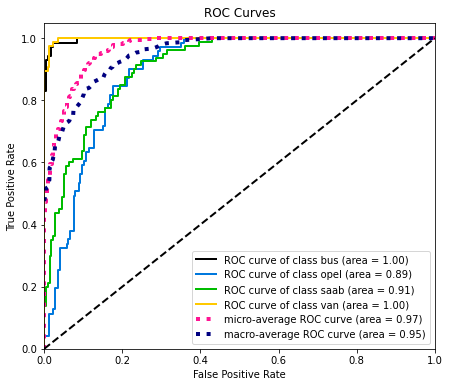

In [11]:
predicted_proba = clf.predict_proba(X_test)

plot_roc(y_test, predicted_proba, figsize=(7, 6))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Text(0, 0.5, 'variance ratio')

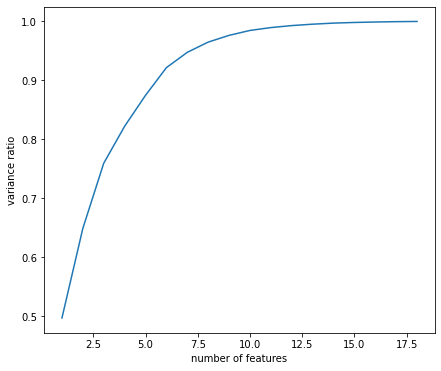

In [13]:
n_components = list(range(1, X_train.shape[1]))

ratio = []
for n in n_components:
    pca = PCA(n)
    pca.fit(X_train)
    
    ratio.append(np.sum(pca.explained_variance_ratio_))
    
plt.figure(figsize=(7, 6))
plt.plot(n_components, ratio)
plt.xlabel('number of features')
plt.ylabel('variance ratio')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Из предыдущего графика видно, что ratio после 12-13 фичей перестает расти, с учетом этого возьмем:

In [14]:
pca = PCA(13)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [15]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, n_jobs = -1)

params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.arange(0.1, 2, 0.1)}

clf = GridSearchCV(estimator = log_reg, param_grid = params, n_jobs = -1)
clf.fit(X_train_pca, y_train)

best_log_reg_pca = clf.best_estimator_
print(best_log_reg_pca)

LogisticRegression(C=1.6, max_iter=500, multi_class='multinomial', n_jobs=-1,
                   solver='saga', tol=0.001)


C:\Users\zuden\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.69764804 0.71951626        nan 0.73229358 0.73409508        nan
 0.74503753 0.73953294        nan 0.75781485 0.75049208        nan
 0.7559633  0.75414512        nan 0.75959967 0.75594662        nan
 0.76323603 0.7559633         nan 0.76141785 0.7559633         nan
 0.76323603 0.75779817        nan 0.76507089 0.75779817        nan
 0.76141785 0.75961635        nan 0.75959967 0.75779817        nan
 0.76141785 0.76326939        nan 0.76141785 0.76326939        nan
 0.76323603 0.76326939        nan 0.76141785 0.76510425        nan
 0.76325271 0.76510425        nan 0.76507089 0.76510425        nan
 0.76507089 0.76510425        nan]
  warnings.warn(


In [16]:
y_pred = clf.predict(X_test_pca)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy =  0.7777777777777778
f1 =  0.7729385260287179


Качество модели немного ухудшилось, как и предплагалось, потому что мы уменьшили размерность признакового пространства

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

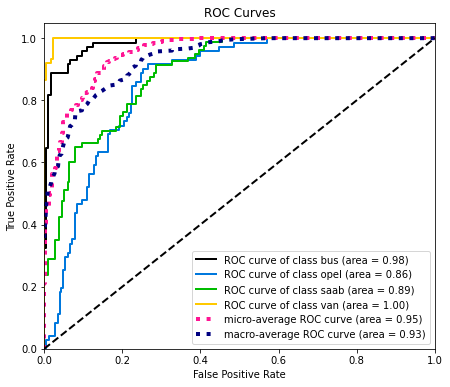

In [17]:
predicted_proba = clf.predict_proba(X_test_pca)

plot_roc(y_test, predicted_proba, figsize=(7,6))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
tree = DecisionTreeClassifier()
params = {'max_depth': list(range(1, 100))}

clf = GridSearchCV(estimator = tree, param_grid = params, n_jobs = -1)
clf.fit(X_train, y_train)

best_tree = clf.best_estimator_
print(best_tree)

DecisionTreeClassifier(max_depth=10)


In [20]:
y_pred = clf.predict(X_test)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy =  0.6127946127946128
f1 =  0.6108548663800928


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

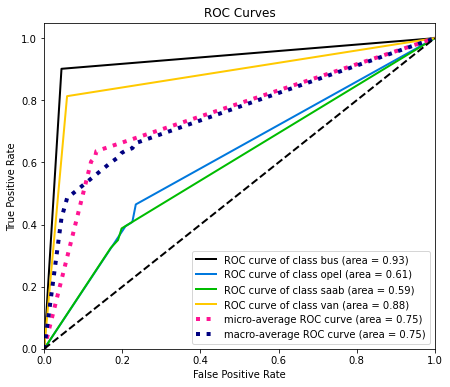

In [21]:
predicted_proba = clf.predict_proba(X_test)

plot_roc(y_test, predicted_proba, figsize=(7,6))

Теперь обучим после применения PCA

In [22]:
tree = DecisionTreeClassifier()
params = {'max_depth': list(range(1, 100))}

clf = GridSearchCV(estimator = tree, param_grid = params, n_jobs = -1)
clf.fit(X_train_pca, y_train)

best_tree_pca = clf.best_estimator_
print(best_tree_pca)

DecisionTreeClassifier(max_depth=87)


In [23]:
y_pred = clf.predict(X_test_pca)

print('accuracy = ', accuracy_score(y_test, y_pred))
print('f1 = ', f1_score(y_test, y_pred, average = 'weighted'))

accuracy =  0.6464646464646465
f1 =  0.6429576039932479


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

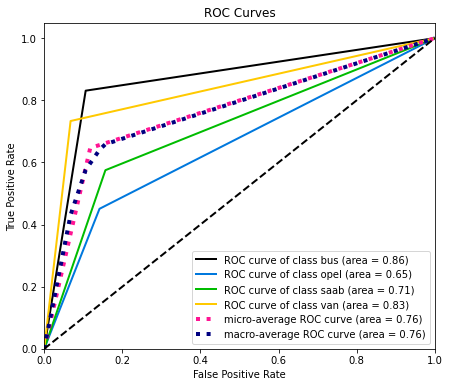

In [24]:
predicted_proba = clf.predict_proba(X_test_pca)

plot_roc(y_test, predicted_proba, figsize=(7,6))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [25]:
from sklearn.ensemble import BaggingClassifier

#### logreg

(0.0, 1.0)

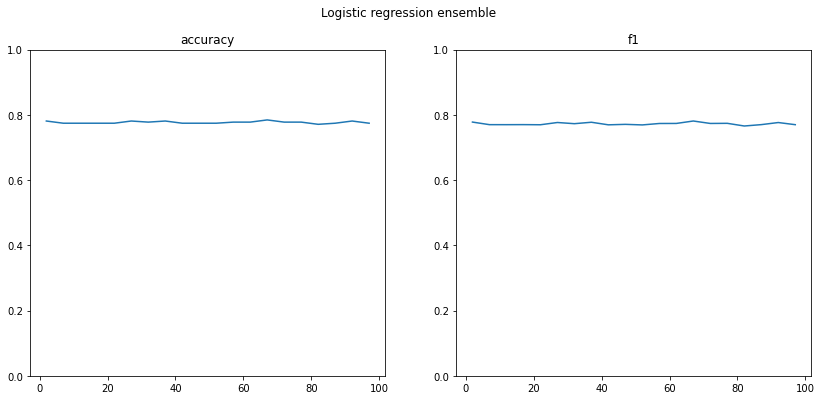

In [26]:
n_algorithms = list(range(2, 100, 5))
accuracy = []
f1 = []

for n in n_algorithms:
    clf = BaggingClassifier(n_estimators = n, base_estimator = best_log_reg_pca)
    clf.fit(X_train_pca, y_train)
    
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
fig.suptitle('Logistic regression ensemble')

ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')
ax1.set_ylim((0.0, 1.0))

ax2.plot(n_algorithms, f1)
ax2.set_title('f1')
ax2.set_ylim((0.0, 1.0))

Заметим, что для логистической регрессии оптимальным будет 30-70 алгоритмов

#### decision tree

In [27]:
accuracy = []
f1 = []

for n in n_algorithms:
    clf = BaggingClassifier(n_estimators = n, base_estimator = best_tree_pca)
    clf.fit(X_train_pca, y_train)
    
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

(0.0, 1.0)

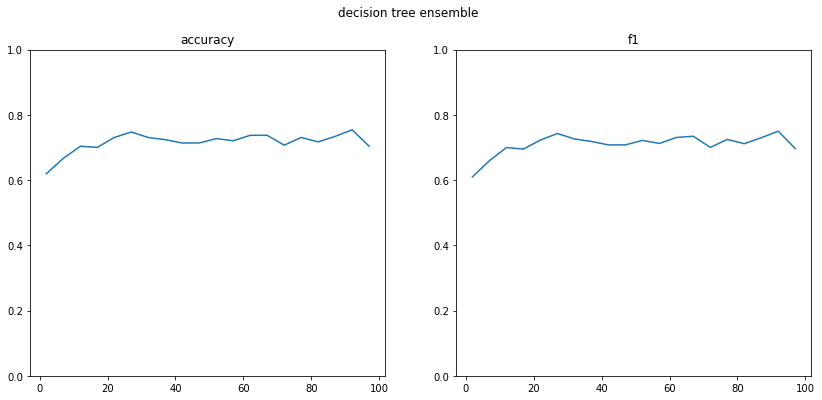

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
fig.suptitle('decision tree ensemble')

ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')
ax1.set_ylim((0.0, 1.0))

ax2.plot(n_algorithms, f1)
ax2.set_title('f1')
ax2.set_ylim((0.0, 1.0))

Заметим, что для дерева решений оптимальным будет 40-100 алгоритмов

Зависимости имеют большой шум, так что оценить оптимальное число более точно достаточно сложно

Я считаю, что мы можем использовать уже найденные оптимальные параметры, потому что тогда мы используем более подходящий гиперпараметр и bagging будет работать лучше

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
accuracy = []
f1 = []

for n in n_algorithms:
    clf = RandomForestClassifier(n_estimators = n)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

Text(0.5, 1.0, 'f1')

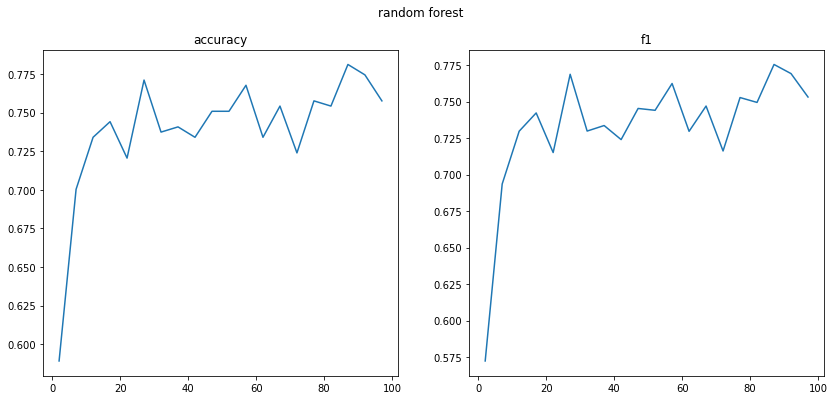

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
fig.suptitle('random forest')
ax1.plot(n_algorithms, accuracy)
ax1.set_title('accuracy')

ax2.plot(n_algorithms, f1)
ax2.set_title('f1')

П




Оптимальное количество деревьев для random forest от 20 до 100, что отличается от bagging'а

Случайный лес — это бэггинг над решающими деревьями, при обучении которых для каждого разбиения признаки выбираются из некоторого случайного подмножества признаков.

Я думаю, что bagging требует большего числа алгоритмов, потому что в нем алгортмы полностью независимы

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [32]:
part_size = len(X_train) // 10 
models = [best_log_reg_pca, best_tree_pca, RandomForestClassifier(80)]

accuracy_arr = np.zeros((10, 3))
f1_arr = np.zeros((10, 3))

for i in range(10):
    X_train_split = X_train_pca[:min(part_size*(i+1), len(X_train))]
    y_train_split = y_train[:min(part_size*(i+1), len(X_train))]
    
    for m in range(len(models)):
        models[m].fit(X_train_split, y_train_split)
        y_pred = models[m].predict(X_test_pca)
        
        accuracy_arr[i, m] = accuracy_score(y_test, y_pred)
        f1_arr[i, m] = f1_score(y_test, y_pred, average='weighted')

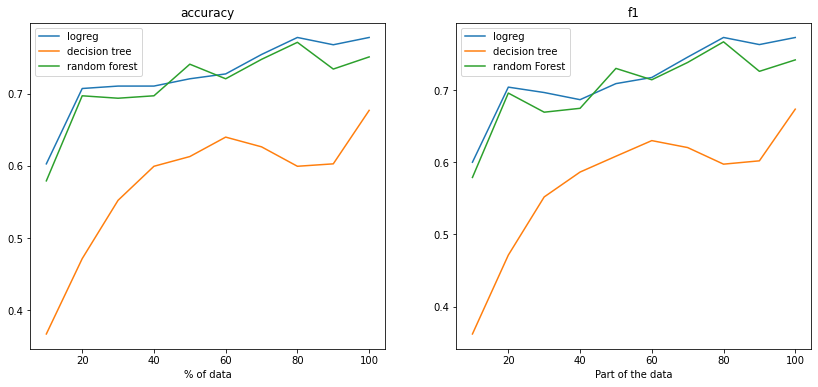

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

part = np.arange(1, 11) * 10

ax1.plot(part, accuracy_arr[:, 0], label = 'logreg')
ax1.plot(part, accuracy_arr[:, 1], label = 'decision tree')
ax1.plot(part, accuracy_arr[:, 2], label = 'random forest')
ax1.set_xlabel('% of data')
ax1.set_title('accuracy')
ax1.legend()

ax2.plot(part, f1_arr[:, 0], label = 'logreg')
ax2.plot(part, f1_arr[:, 1], label = 'decision tree')
ax2.plot(part, f1_arr[:, 2], label = 'random Forest')
ax2.set_xlabel('Part of the data')
ax2.set_title('f1')
ax2.legend()

При увеличении тренировочной выборки сначала качество моделей улучшается, однако затем скорость роста уменьшается и качестов почти не изменяется. Decision tree на любом размере обучающей выборки показывает худший результат, однако у него рост качества при увеличении тренировочной выборки растет более заметно, чем у двух других моделей.